# Connectivity Diagrams of synthetic 2D electrodes


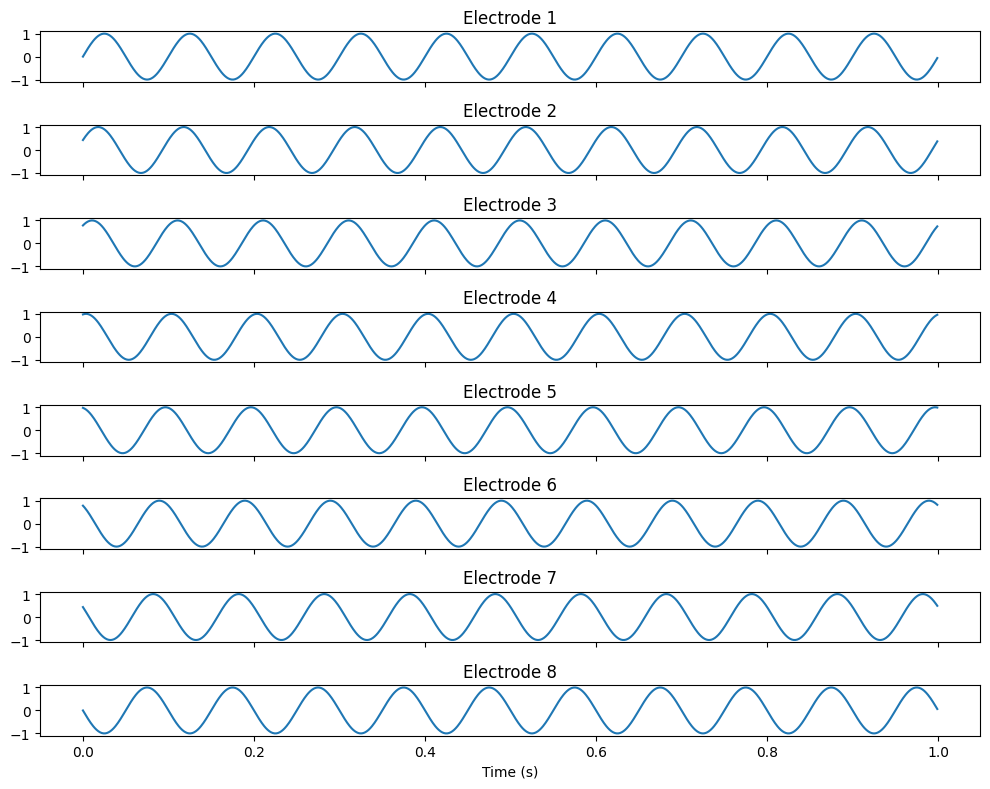

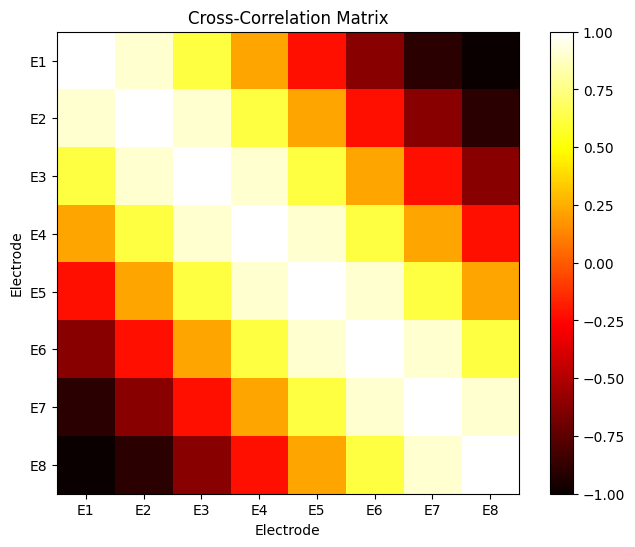

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for 8 electrodes
np.random.seed(42)  # Ensure reproducibility

# Time array
t = np.linspace(0, 1, 1000, endpoint=False)

# Simulated signals for 8 electrodes, using sinusoidal waves with slight phase shifts
signals = [np.sin(2 * np.pi * 10 * t + phase) for phase in np.linspace(0, np.pi, 8)]

# Calculate cross-correlation matrix
correlation_matrix = np.corrcoef(signals)

# Plot the signals for visualization
fig, axs = plt.subplots(8, 1, figsize=(10, 8), sharex=True)

for i, signal in enumerate(signals):
    axs[i].plot(t, signal)
    axs[i].set_title(f"Electrode {i+1}")
plt.xlabel("Time (s)")
plt.tight_layout()

# Display the cross-correlation matrix
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap="hot", interpolation="nearest")
plt.colorbar()
plt.title("Cross-Correlation Matrix")
plt.xlabel("Electrode")
plt.ylabel("Electrode")
plt.xticks(range(8), labels=[f"E{i+1}" for i in range(8)])
plt.yticks(range(8), labels=[f"E{i+1}" for i in range(8)])

plt.show()

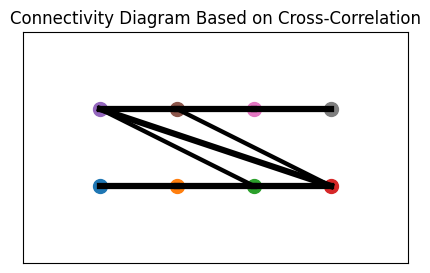

In [3]:
# Define electrode positions in a 2x4 grid
positions = [(x, y) for y in range(2) for x in range(4)]

# Create the connectivity diagram
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_aspect("equal")

# Plot electrodes
for pos in positions:
    ax.plot(pos[0], pos[1], "o", markersize=10, label="Electrode")

# Draw lines between electrodes based on cross-correlation
threshold = 0.5  # Only consider connections with a correlation above this value
for i, pos_i in enumerate(positions):
    for j, pos_j in enumerate(positions):
        # Only draw line if correlation is above threshold and avoid duplicate lines
        if i < j and correlation_matrix[i, j] > threshold:
            # Line thickness based on correlation
            linewidth = 5 * correlation_matrix[i, j]
            ax.plot([pos_i[0], pos_j[0]], [pos_i[1], pos_j[1]], "k-", lw=linewidth)

# Set limits and labels
ax.set_xlim(-1, 4)
ax.set_ylim(-1, 2)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Connectivity Diagram Based on Cross-Correlation")

plt.show()

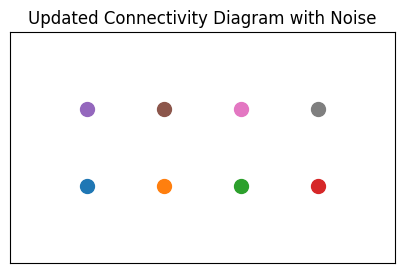

In [4]:
# Adjusting synthetic data: adding more randomness and noise

# Generate more complex signals for 8 electrodes
# Including random phase shifts and frequencies, plus added noise
np.random.seed(42)  # Ensure reproducibility
frequencies = np.random.uniform(5, 15, size=8)  # Random frequencies between 5 and 15 Hz
phases = np.random.uniform(0, 2 * np.pi, size=8)  # Random phase shifts

signals = [
    np.sin(2 * np.pi * f * t + phase) + np.random.normal(0, 0.5, size=t.shape)
    for f, phase in zip(frequencies, phases)
]

# Recalculate cross-correlation matrix with the adjusted signals
correlation_matrix_adjusted = np.corrcoef(signals)

# Create the updated connectivity diagram
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_aspect("equal")

# Plot electrodes with the new data
for pos in positions:
    ax.plot(pos[0], pos[1], "o", markersize=10, label="Electrode")

# Draw lines between electrodes based on the new cross-correlation
threshold = 0.5  # Maintain the same threshold for simplicity
for i, pos_i in enumerate(positions):
    for j, pos_j in enumerate(positions):
        # Only draw line if correlation is above threshold and avoid duplicate lines
        if i < j and correlation_matrix_adjusted[i, j] > threshold:
            # Line thickness based on correlation
            linewidth = 5 * correlation_matrix_adjusted[i, j]
            ax.plot([pos_i[0], pos_j[0]], [pos_i[1], pos_j[1]], "k-", lw=linewidth)

# Set limits and labels
ax.set_xlim(-1, 4)
ax.set_ylim(-1, 2)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Updated Connectivity Diagram with Noise")

plt.show()

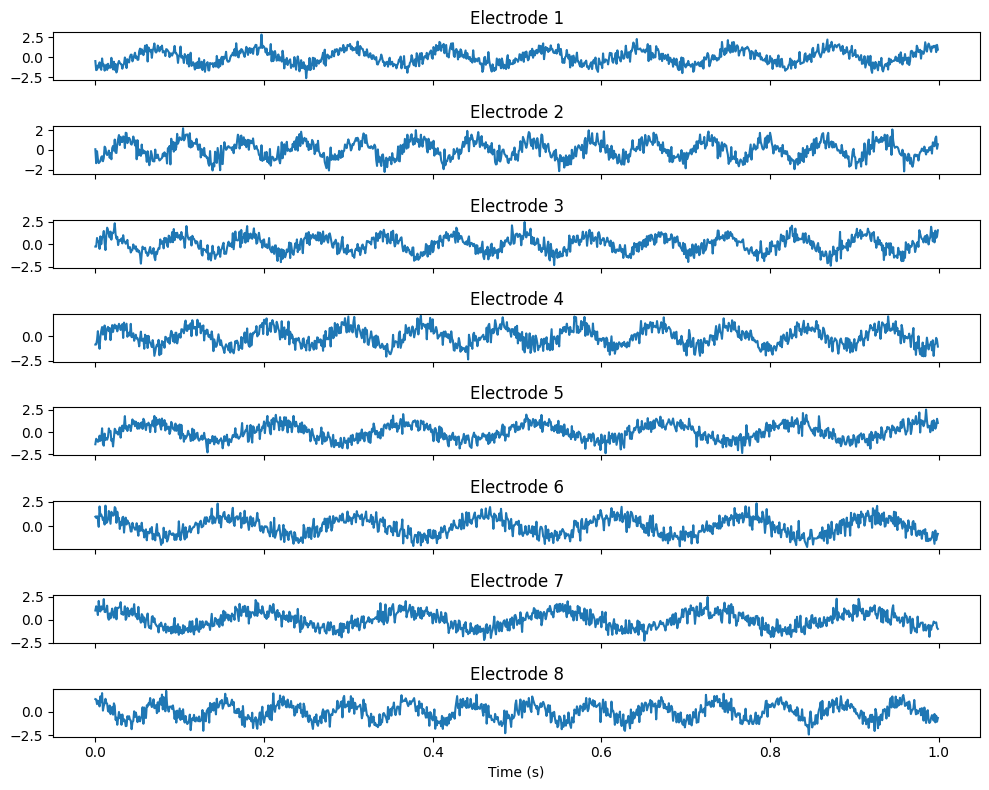

In [5]:
# Plot the new synthetic signals for visualization
fig, axs = plt.subplots(8, 1, figsize=(10, 8), sharex=True)

for i, signal in enumerate(signals):
    axs[i].plot(t, signal)
    axs[i].set_title(f"Electrode {i+1}")
plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()

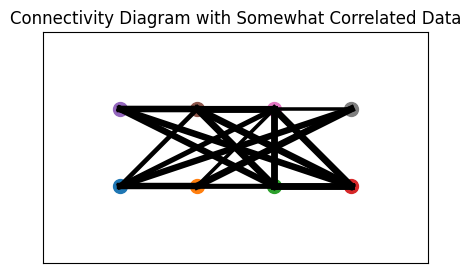

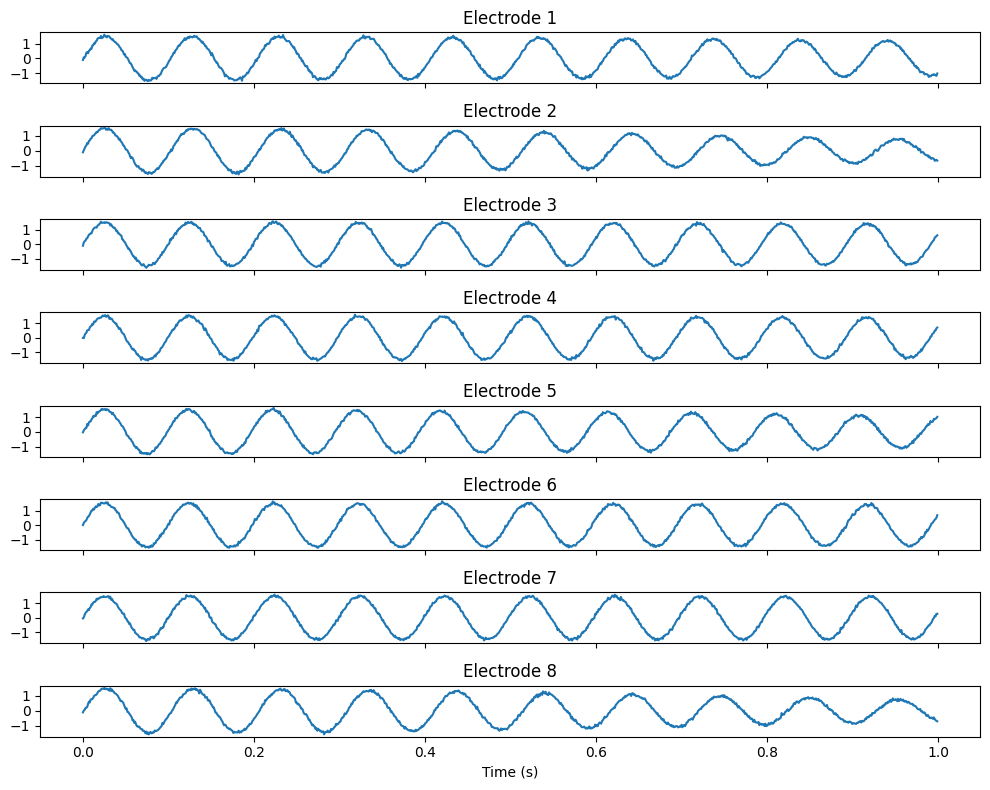

In [6]:
# Generate a base signal
base_frequency = 10  # Hz
base_signal = np.sin(2 * np.pi * base_frequency * t)

# Generate signals for 8 electrodes with slight variations and added noise
varied_signals = []
for i in range(8):
    # Slight random frequency and phase adjustments
    frequency_adjustment = np.random.uniform(-0.5, 0.5)  # Small adjustment to frequency
    phase_adjustment = np.random.uniform(-0.1, 0.1)  # Small phase adjustment

    # Generate the signal with adjustments and noise
    signal = np.sin(
        2 * np.pi * (base_frequency + frequency_adjustment) * t + phase_adjustment
    ) + 0.1 * np.random.normal(0, 0.5, size=t.shape)  # Adding less noise

    varied_signals.append(
        signal + 0.5 * base_signal
    )  # Mix in the base signal to ensure some correlation

# Recalculate cross-correlation matrix with the new, somewhat correlated signals
correlation_matrix_somewhat_correlated = np.corrcoef(varied_signals)

# Create the connectivity diagram again with the updated signals
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_aspect("equal")

# Plot electrodes
for pos in positions:
    ax.plot(pos[0], pos[1], "o", markersize=10, label="Electrode")

# Draw lines based on the new cross-correlation matrix
for i, pos_i in enumerate(positions):
    for j, pos_j in enumerate(positions):
        # Draw line if correlation is above threshold and avoid duplicate lines
        if i < j and correlation_matrix_somewhat_correlated[i, j] > threshold:
            # Line thickness based on correlation
            linewidth = 5 * correlation_matrix_somewhat_correlated[i, j]
            ax.plot([pos_i[0], pos_j[0]], [pos_i[1], pos_j[1]], "k-", lw=linewidth)

# Set limits and labels
ax.set_xlim(-1, 4)
ax.set_ylim(-1, 2)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Connectivity Diagram with Somewhat Correlated Data")

plt.show()

# Plot the updated synthetic signals for visualization
fig, axs = plt.subplots(8, 1, figsize=(10, 8), sharex=True)

for i, signal in enumerate(varied_signals):
    axs[i].plot(t, signal)
    axs[i].set_title(f"Electrode {i+1}")
plt.xlabel("Time (s)")
plt.tight_layout()

plt.show()

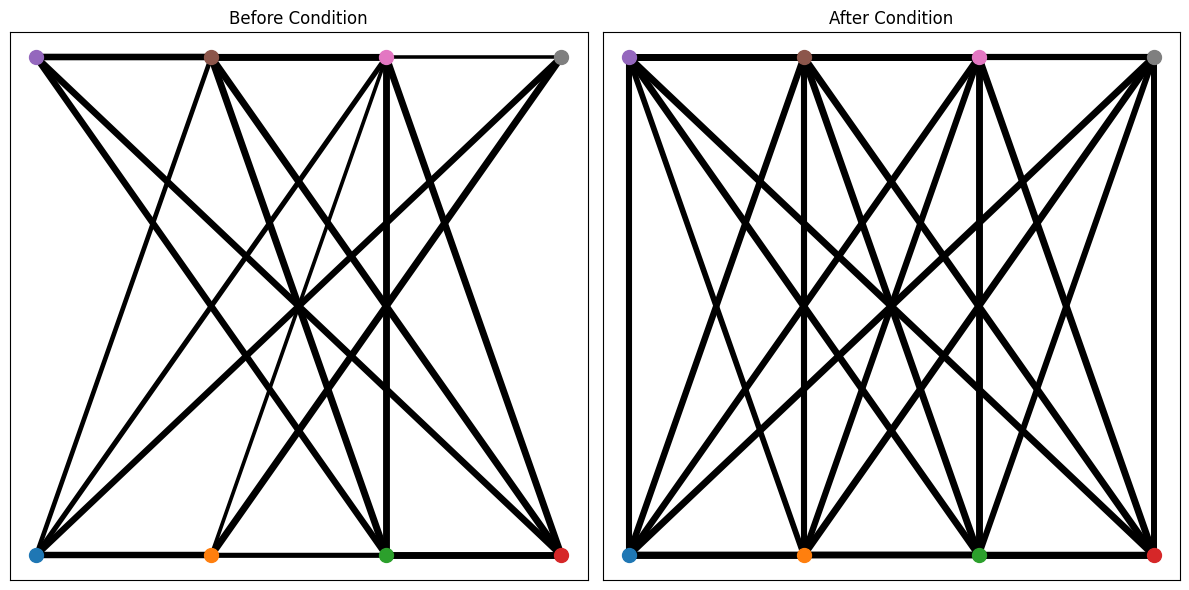

In [7]:
# Modify the synthetic data for a "before" and "after" comparison

# "Before" data is already available as `varied_signals`
before_signals = varied_signals.copy()

# "After" data: Introduce a change halfway through the signal
after_signals = []
for signal in varied_signals:
    # Split the signal
    first_half = signal[: len(signal) // 2]
    # For the second half, increase the frequency and add a distinct pattern
    second_half = np.sin(
        4 * np.pi * base_frequency * t[len(t) // 2 :] + np.random.uniform(-0.1, 0.1)
    ) + 0.1 * np.random.normal(0, 0.5, size=first_half.shape)
    # Combine the halves
    after_signal = np.concatenate((first_half, second_half))
    after_signals.append(after_signal)

# Recalculate cross-correlation matrices for "before" and "after"
correlation_matrix_before = np.corrcoef(before_signals)
correlation_matrix_after = np.corrcoef(after_signals)

# Plot connectivity diagrams for "before" and "after"
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot "before"
for i, pos_i in enumerate(positions):
    for j, pos_j in enumerate(positions):
        if i < j and correlation_matrix_before[i, j] > threshold:
            linewidth = 5 * correlation_matrix_before[i, j]
            axes[0].plot([pos_i[0], pos_j[0]], [pos_i[1], pos_j[1]], "k-", lw=linewidth)
for pos in positions:
    axes[0].plot(pos[0], pos[1], "o", markersize=10)
axes[0].set_title("Before Condition")
axes[0].set_xticks([])
axes[0].set_yticks([])

# Plot "after"
for i, pos_i in enumerate(positions):
    for j, pos_j in enumerate(positions):
        if i < j and correlation_matrix_after[i, j] > threshold:
            linewidth = 5 * correlation_matrix_after[i, j]
            axes[1].plot([pos_i[0], pos_j[0]], [pos_i[1], pos_j[1]], "k-", lw=linewidth)
for pos in positions:
    axes[1].plot(pos[0], pos[1], "o", markersize=10)
axes[1].set_title("After Condition")
axes[1].set_xticks([])
axes[1].set_yticks([])

plt.tight_layout()
plt.show()

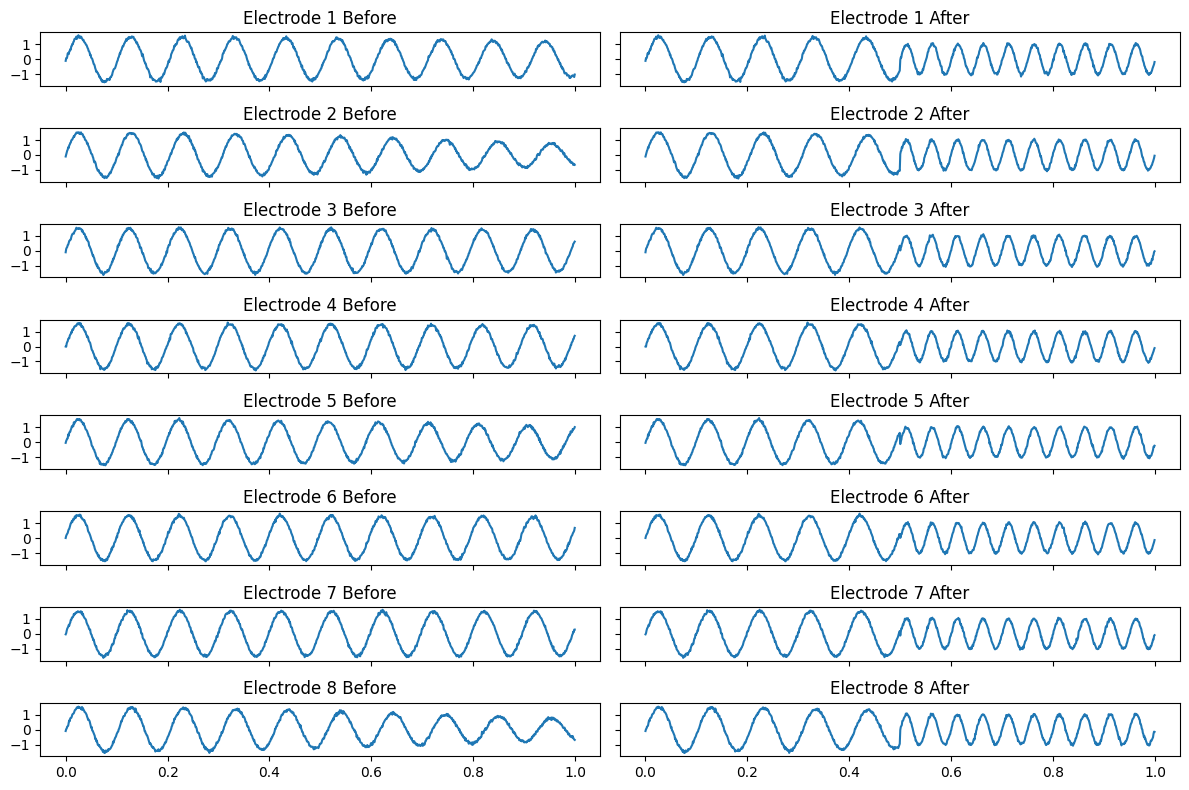

In [8]:
# Plot the time series for both "before" and "after" conditions for comparison
fig, axs = plt.subplots(8, 2, figsize=(12, 8), sharex=True, sharey=True)

# Plot "before" condition
for i, signal in enumerate(before_signals):
    axs[i, 0].plot(t, signal)
    axs[i, 0].set_title(f"Electrode {i+1} Before")

# Plot "after" condition
for i, signal in enumerate(after_signals):
    axs[i, 1].plot(t, signal)
    axs[i, 1].set_title(f"Electrode {i+1} After")

plt.tight_layout()
plt.show()